In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
df = pd.read_csv('data\\processed\\marketing_campaign_features.csv')

df.drop(columns=['ID'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Spending             2029 non-null   float64
 1   Age                        2029 non-null   float64
 2   Income                     2029 non-null   float64
 3   Customer_Seniority         2029 non-null   float64
 4   Total_Purchases            2029 non-null   float64
 5   Campaign_Response_Rate     2029 non-null   float64
 6   Recency                    2029 non-null   float64
 7   Engagement_Score           2029 non-null   float64
 8   Has_Children               2029 non-null   int64  
 9   Education_Basic            2029 non-null   bool   
 10  Education_Graduation       2029 non-null   bool   
 11  Education_Master           2029 non-null   bool   
 12  Education_PhD              2029 non-null   bool   
 13  Marital_Status_Married     2029 non-null   bool 

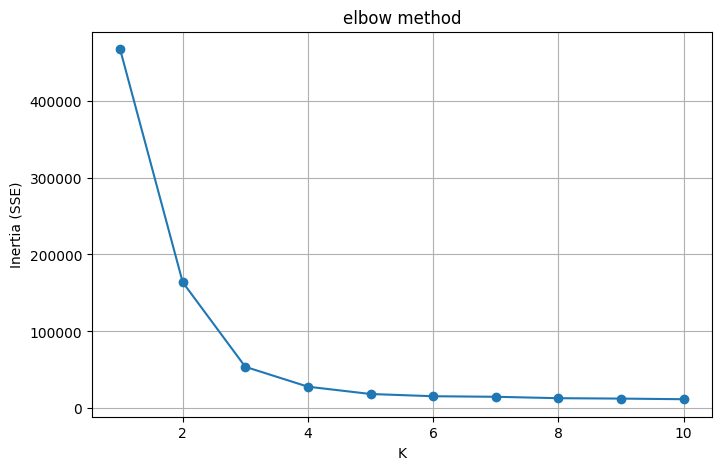

In [39]:
inertias = []

# Tester de K = 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("elbow method")
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

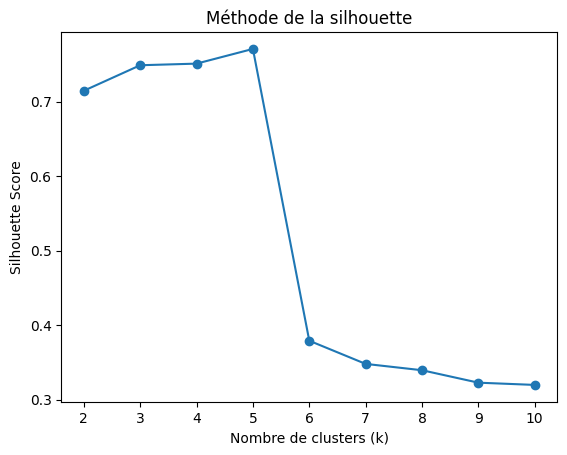

In [40]:
from sklearn.metrics import silhouette_score



silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette")
plt.show()

## Visualisation des clusters trouvés par k-means . 
## Non concluant ❌ ( car forme non sphérique )

In [ ]:

kmeans = KMeans(n_clusters= 5, random_state=42)  # n_clusters = nombre de clusters 
kmeans.fit(df)
# création de la variable labels qui correspond a chaque point
labels = kmeans.labels_


df['cluster'] = labels

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

KeyboardInterrupt: 

## GMM (Gaussian Mixture Model)

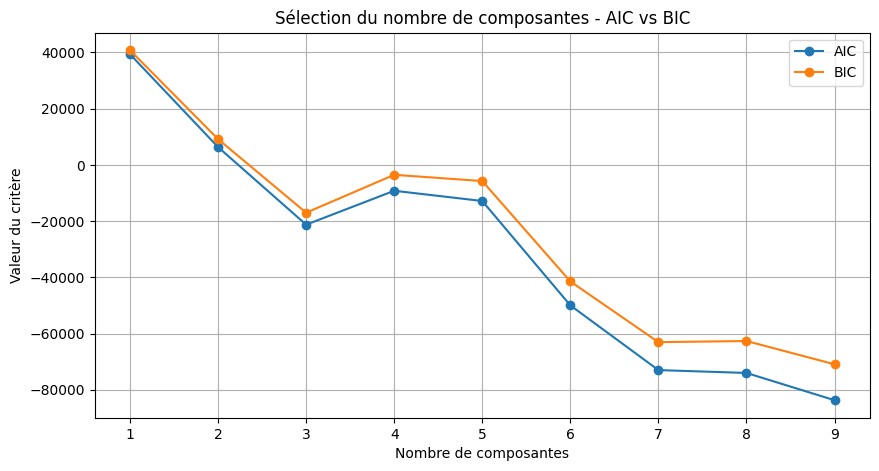

In [14]:
aic = []
bic = []
n_components_range = range(1, 10)

# 3. Test de plusieurs nombres de composantes
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df)
    aic.append(gmm.aic(df))
    bic.append(gmm.bic(df))

# 4. Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Valeur du critère')
plt.title('Sélection du nombre de composantes - AIC vs BIC')
plt.legend()
plt.grid(True)
plt.show()

## 📊 Analyse des résultats AIC/BIC

### **Observations du graphique :**

1. **📉 Tendance générale :** Les deux courbes **diminuent** de K=1 à K=9, ce qui est un bon signe
   
2. **🔍 Points d'inflexion notables :**
   - **AIC** : Diminution forte jusqu'à K=3, puis plus graduelle
   - **BIC** : Diminution marquée jusqu'à K=3, légère remontée à K=4-5, puis baisse continue

3. **⚖️ Comparaison AIC vs BIC :**
   - **AIC** semble continuer à baisser même à K=9 (favorise plus de composantes)
   - **BIC** montre une stabilisation relative autour de K=7-9 (préfère la simplicité)

### **🎯 Recommandations basées sur ces résultats :**

- **K=3** : Premier point d'inflexion significatif (bon compromis simplicité/performance)
- **K=7-9** : Zone de stabilisation du BIC (modèles plus complexes mais stables)

### **🔄 Prochaine étape :** 
Utilisons le **Silhouette Score** pour trancher entre ces candidats et valider le choix optimal !

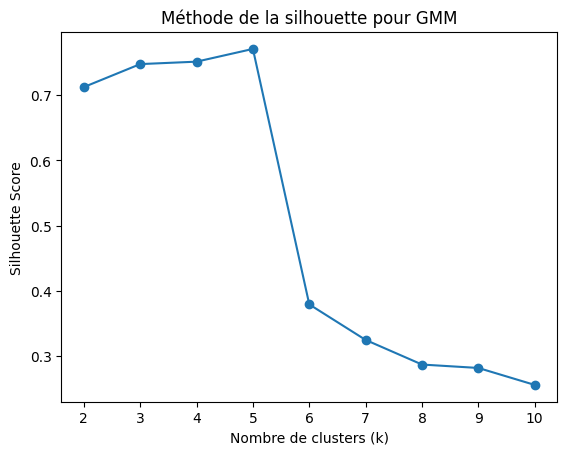

Silhouette Score optimal à K = 5
Score maximal: 0.771


In [9]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42) 
    gmm.fit(df)
    score = silhouette_score(df, gmm.predict(df)) 
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette pour GMM")
plt.show()

print(f"Silhouette Score optimal à K = {k_range[silhouette_scores.index(max(silhouette_scores))]}")
print(f"Score maximal: {max(silhouette_scores):.3f}")

## test avec avec k=10

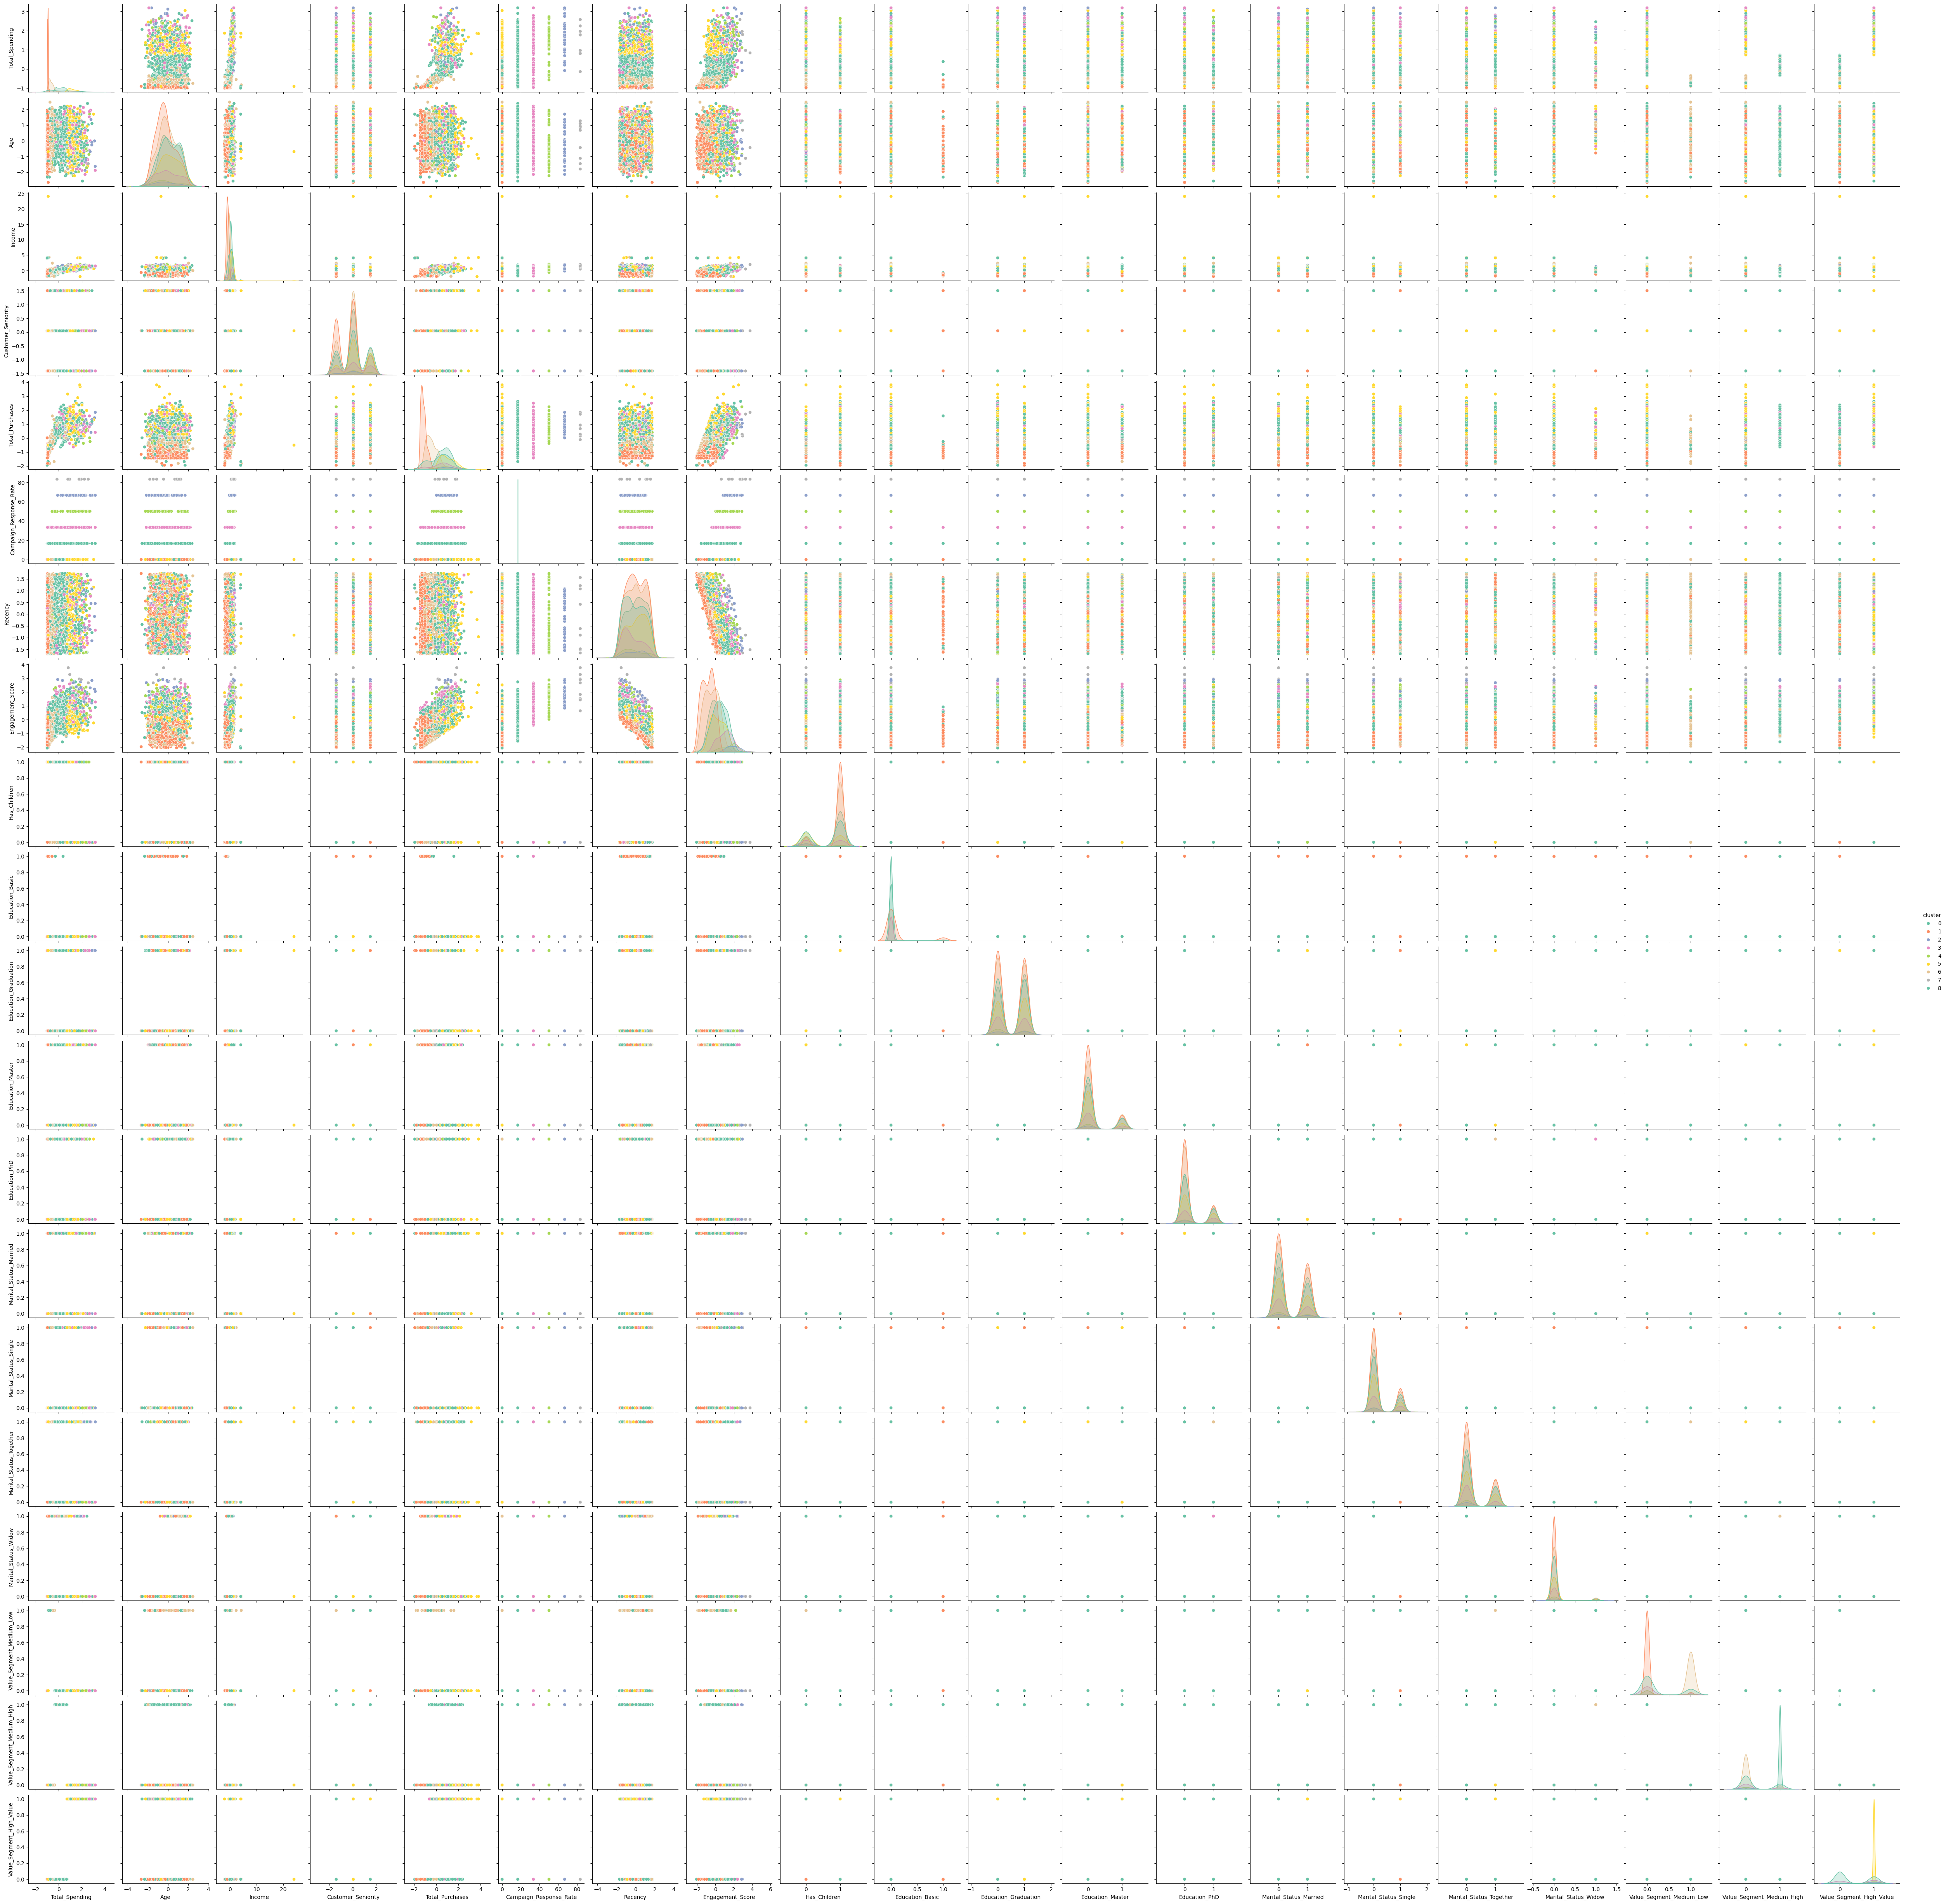

In [12]:
gmm = GaussianMixture(n_components= 9, random_state=42)   
labels = gmm.fit_predict(df)
# création de la variable labels qui correspond a chaque point

df['cluster'] = labels

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

## test avec k = 5 (donné par le silhouette score)

In [17]:
gmm = GaussianMixture(n_components= 5, random_state=42)   
labels = gmm.fit_predict(df)
# création de la variable labels qui correspond a chaque point

df['cluster'] = labels

# Tri du DataFrame par cluster pour une meilleure lisibilité
df_sorted = df.sort_values('cluster').reset_index(drop=True)

# Sauvegarde du DataFrame trié avec les clusters GMM
df_sorted.to_csv('data/clusters/gmm.csv', index=False)

# # affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
# sns.pairplot(df, hue='cluster', palette='Set2')
# plt.show()

In [18]:
df.groupby('cluster').mean(numeric_only=True)

,Total_Spending,Age,Income,Customer_Seniority,Total_Purchases,Campaign_Response_Rate,Recency,Engagement_Score,Has_Children,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Value_Segment_Medium_Low,Value_Segment_Medium_High,Value_Segment_High_Value
cluster,,,,,,,,,,,,,,,,,,,,
0,0.353265,0.117280,0.161600,0.102399,0.296754,16.666667,-0.113768,0.446785,0.634783,0.014493,0.498551,0.173913,0.234783,0.350725,0.240580,0.257971,0.040580,0.231884,0.284058,0.368116
1,-0.244776,-0.015174,-0.138421,-0.042096,-0.155003,0.000000,0.065492,-0.302175,0.788540,0.029332,0.505457,0.163711,0.203956,0.399727,0.204638,0.260573,0.030696,0.278990,0.252387,0.158936
2,1.658778,-0.217631,1.190147,-0.091461,0.879279,70.238095,-0.117521,2.000354,0.142857,0.000000,0.547619,0.142857,0.238095,0.380952,0.190476,0.214286,0.071429,0.000000,0.142857,0.857143
3,0.772547,0.008570,0.390221,0.159633,0.401838,33.333333,-0.329454,1.034340,0.500000,0.007692,0.476923,0.169231,0.300000,0.369231,0.269231,0.192308,0.046154,0.130769,0.200000,0.569231
4,1.453612,-0.221526,1.009962,0.205972,0.775768,50.000000,-0.195578,1.529750,0.282609,0.000000,0.413043,0.152174,0.304348,0.369565,0.326087,0.195652,0.043478,0.043478,0.130435,0.826087
